# Ceneo analyzer

## Loading libraries

In [179]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Listing codes for all products for which opinions have been extracted

In [180]:
if os.path.exists("opinions"):
    print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

13029872


## Specifying opinions about which product are to be analyzed

In [181]:
product_id = input("Please provide Ceneo.pl product code: ")

## Importing opinions from JSON file to pandas.DataFrame object

In [182]:
opinions = pd.read_json(f"opinions/{product_id}.json")
MAX_SCORE = 5
opinions.score = opinions.score.apply(lambda s: round(s*MAX_SCORE, 1))

In [183]:
opinions

,opinion_id,author,recommendation,score,content,pros,cons,helpful,unhelpful,publish_date,purchase_date
0,14225294,A...k,NaN,3.0,The color does not match the order. It was sup...,"[functionality, comfortable]",None,1,2,2021-03-18 19:50:23,2021-04-02 22:28:44
1,14089388,p...a,1.0,4.0,Quite a nice piece of furniture. Easy to assem...,"[functionality, appearance, comfortable, resil...",None,0,1,2021-02-07 13:43:59,2021-03-10 14:00:26
2,12038573,Użytkownik Ceneo,NaN,3.5,"solid workmanship, but the armchair elements a...",None,None,3,2,2020-03-20 17:29:35,2020-04-01 22:29:48
3,15861753,e...t,1.0,5.0,Very accurate workmanship and easy assembly. T...,"[functionality, appearance, comfortable, resil...",None,0,0,2022-03-05 16:46:14,2022-03-23 19:34:15
4,11521241,Ayla,1.0,5.0,"The armchair looks very good in real life, loo...",None,None,0,2,2019-12-13 10:38:44,2020-01-02 16:00:48
...,...,...,...,...,...,...,...,...,...,...,...
59,11664642,Użytkownik Ceneo,0.0,2.5,made quite carelessly,None,None,0,1,2020-01-17 10:28:34,2020-01-30 09:56:59
60,10866165,Użytkownik Ceneo,NaN,5.0,5.0/5,None,None,0,0,None,2019-08-01 23:05:34
61,6928680,Użytkownik Ceneo,NaN,5.0,5.0/5,None,None,0,0,None,2019-07-31 00:00:00
62,10673470,Użytkownik Ceneo,NaN,5.0,5.0/5,None,None,0,0,None,2019-06-18 11:57:49


## Basic statistics

In [184]:
MAX_SCORE = 5
opinions_count = opinions.shape[0]
pros_count = opinions.pros.apply(lambda p: None if not p else p).count()
cons_count = opinions.cons.apply(lambda p: None if not p else p).count()
average_score = opinions.score.mean() * MAX_SCORE   

In [185]:
opinions_count

64

In [186]:
pros_count

27

In [187]:
cons_count

6

In [188]:
average_score

22.1875

## Basic charts

### Score histogram

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '12'),
 Text(0, 0, '6'),
 Text(0, 0, '37')]

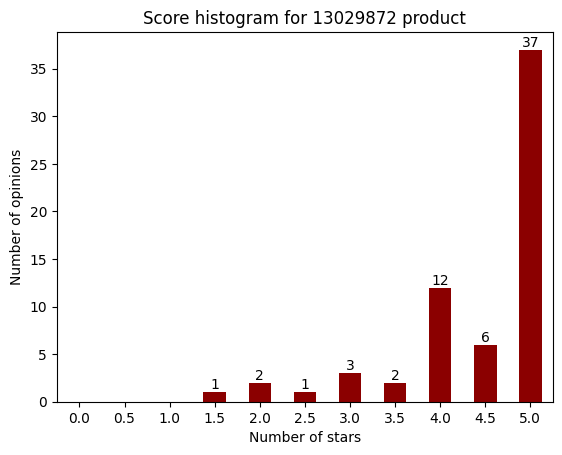

In [189]:
score_distribution = opinions.score.value_counts().reindex(np.arange(0, 5.5, 0.5), fill_value = 0)
fig, ax = plt.subplots()
score_distribution.plot.bar(color = "darkred")
plt.xlabel("Number of stars")
plt.ylabel("Number of opinions")
plt.title(f"Score histogram for {product_id} product")
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], label_type="edge", fmt = lambda l: int(l) if l else "")

### Recommendations shares

Text(0.5, 1.0, 'Recommendations shares for 13029872 product')

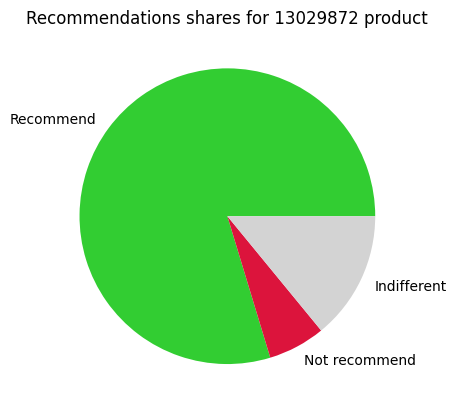

In [ ]:
recommendation_distribution = opinions.recommendation.value_counts(dropna=False).reindex([True, False, np.nan], fill_value = 0)
score_distribution = opinions.score.value_counts().reindex(np.arange(0, 5.5, 0.5), )
recommendation_distribution.plot.pie(
    labels = ["Recommend", "Not recommend", "Indifferent"],
    label = "",
    colors = ["limegreen", "crimson", "lightgray"],
    autopct = lambda l: "(1.1f)%".format(l) if l else "",
)
plt.title(f"Recommendations shares for {product_id} product")